In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
df_train = pd.read_csv(r"C:\Users\Risha\Downloads\Train_Data.csv")
df_to_predict = pd.read_csv(r"C:\Users\Risha\Downloads\Test_Data.csv")

In [81]:
print("Number of rows in training dataset",df_train.shape)
print("Number of rows in prediction dataset",df_to_predict.shape)

Number of rows in training dataset (4571, 9)
Number of rows in prediction dataset (318, 8)


In [3]:
df_train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [4]:
df_train.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [5]:
null_columns=df_train.columns[df_train.isnull().any()]
print(df_train[df_train.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [6]:
duplicateRowsDF = df_train[df_train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(1, 9)

In [7]:
df_train.drop_duplicates(keep='first',inplace=True)

In [8]:
df_to_predict.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [9]:
df_train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [10]:
df_train.adgroup.replace(['adgroup 1','adgroup 2', 'adgroup 3', 'adgroup 4'], [1, 2, 3, 4], inplace=True)
df_to_predict.adgroup.replace(['adgroup 1','adgroup 2', 'adgroup 3', 'adgroup 4'], [1, 2, 3, 4], inplace=True)
df_train["adgroup"] = df_train["adgroup"].astype(int)
df_to_predict["adgroup"] = df_to_predict["adgroup"].astype(int)

In [11]:
df_train["adgroup"].dtype

dtype('int32')

In [12]:
df_train["isWeekend"] = ((pd.to_datetime(df_train["date"], format = '%d-%m-%Y').dt.dayofweek) // 5 == 1).astype(int)
df_train["Day_of_Week"] = pd.to_datetime(df_train["date"], format = '%d-%m-%Y').dt.day_name()
df_train["Day_Of_ad"] = pd.to_datetime(df_train["date"], format = '%d-%m-%Y').dt.day
df_train["Month_of_ad"] = pd.to_datetime(df_train["date"], format = '%d-%m-%Y').dt.month

df_to_predict["isWeekend"] = ((pd.to_datetime(df_to_predict["date"], format = '%d-%m-%Y').dt.dayofweek) // 5 == 1).astype(int)
df_to_predict["Day_Of_ad"] = pd.to_datetime(df_to_predict["date"], format = '%d-%m-%Y').dt.day
df_to_predict["Day_of_Week"] = pd.to_datetime(df_to_predict["date"], format = '%d-%m-%Y').dt.day_name()
df_to_predict["Month_of_ad"] = pd.to_datetime(df_to_predict["date"], format = '%d-%m-%Y').dt.month

In [13]:
df_train.drop(labels = 'date', axis = 1, inplace = True)
df_to_predict.drop(labels = 'date', axis = 1, inplace = True)

In [14]:
X = df_train.drop(["revenue"], axis=1)
y = np.log1p(df_train["revenue"])
X_to_predict = df_to_predict

In [15]:
X.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,isWeekend,Day_of_Week,Day_Of_ad,Month_of_ad
0,campaign 1,1,ad 1,24,6,0.08,0,1,Saturday,1,8
1,campaign 1,2,ad 1,1,0,0.00,0,1,Saturday,1,8
2,campaign 1,3,ad 1,13,4,0.04,0,1,Saturday,1,8
3,campaign 1,4,ad 1,5,4,0.08,0,1,Saturday,1,8
4,campaign 1,1,ad 2,247,126,1.29,4,1,Saturday,1,8


In [16]:
X_categorical = X.select_dtypes(exclude=['int', 'float'])
X_numerical = X.select_dtypes(include=['int', 'float'])

X_to_predict_categorical = X_to_predict.select_dtypes(exclude=['int', 'float'])
X_to_predict_numerical = X_to_predict.select_dtypes(include=['int', 'float'])

In [17]:
X_categorical.head()

,campaign,ad,impressions,clicks,conversions,Day_of_Week,Day_Of_ad,Month_of_ad
0,campaign 1,ad 1,24,6,0,Saturday,1,8
1,campaign 1,ad 1,1,0,0,Saturday,1,8
2,campaign 1,ad 1,13,4,0,Saturday,1,8
3,campaign 1,ad 1,5,4,0,Saturday,1,8
4,campaign 1,ad 2,247,126,4,Saturday,1,8


In [18]:
X_numerical_graph = X_numerical.copy()
X_categorical_graph = X_categorical.copy()

In [19]:
X_categorical.shape

(4570, 8)

In [20]:
X_numerical.head()

,adgroup,cost,isWeekend
0,1,0.08,1
1,2,0.00,1
2,3,0.04,1
3,4,0.08,1
4,1,1.29,1


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_categorical = X_categorical.apply(LabelEncoder().fit_transform)
X_to_predict_categorical = X_to_predict_categorical.apply(LabelEncoder().fit_transform)

In [22]:
X_categorical.head()

,campaign,ad,impressions,clicks,conversions,Day_of_Week,Day_Of_ad,Month_of_ad
0,0,0,23,6,0,2,0,2
1,0,0,0,0,0,2,0,2
2,0,0,12,4,0,2,0,2
3,0,0,4,4,0,2,0,2
4,0,11,243,126,4,2,0,2


In [23]:
X_numerical.head()

,adgroup,cost,isWeekend
0,1,0.08,1
1,2,0.00,1
2,3,0.04,1
3,4,0.08,1
4,1,1.29,1


In [24]:
from scipy.stats import skew
skewed_feats = X_numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 3 skewed numerical features to Box Cox transform


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
cols_train = list(X_numerical.columns)
index_train = X_numerical.index.tolist()
cols_test = list(X_to_predict_numerical.columns)
index_test = X_to_predict_numerical.index.tolist()
X_numerical_names = X_numerical.columns
X_numerical_index = X_numerical.index
X_to_predict_numerical_names = X_to_predict_numerical.columns
mmx = MinMaxScaler()
df_minmax = mmx.fit_transform(X_numerical)
df_minmax_test = mmx.fit_transform(X_to_predict_numerical)
X_numerical = pd.DataFrame(data=df_minmax,columns=cols_train,index=index_train)
X_to_predict_numerical = pd.DataFrame(data=df_minmax_test,columns=cols_test,index=index_test)

In [34]:
X_numerical.head(5)

,adgroup,cost,isWeekend
0,0.000000,0.000214,1.0
1,0.409691,0.000000,1.0
2,0.731903,0.000107,1.0
3,1.000000,0.000214,1.0
4,0.000000,0.003443,1.0


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
cols_train = list(X_numerical.columns)
index_train = X_numerical.index.tolist()
cols_test = list(X_to_predict_numerical.columns)
index_test = X_to_predict_numerical.index.tolist()
X_numerical_names = X_numerical.columns
X_numerical_index = X_numerical.index
X_to_predict_numerical_names = X_to_predict_numerical.columns
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.5
for feat in skewed_features:
    #all_data[feat] += 1
    X_numerical[feat] = boxcox1p(X_numerical[feat], lam)
    X_to_predict_numerical[feat] = boxcox1p(X_to_predict_numerical[feat], lam)

In [30]:
X_numerical.head(5)

,adgroup,cost,isWeekend
0,0.000000,0.000151,0.828427
1,0.309401,0.000000,0.828427
2,0.581989,0.000075,0.828427
3,0.828427,0.000151,0.828427
4,0.000000,0.002427,0.828427


In [35]:
X = pd.concat([X_categorical, X_numerical], axis=1)
X_to_predict = pd.concat([X_to_predict_categorical, X_to_predict_numerical], axis=1)

In [36]:
print(X.shape, X_numerical.shape, X_categorical.shape)
print(X_to_predict.shape, X_to_predict_numerical.shape, X_to_predict_categorical.shape)
print(y.shape)

(4570, 11) (4570, 3) (4570, 8)
(318, 11) (318, 3) (318, 8)
(4570,)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
def print_accuracy_report(y_test, y_pred,X_test, model):
    print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 0.6257138955575338
Mean Absolute Error: 1.2267401374413178
Mean Squared Error: 2.8396227080369196
Root Mean Squared Error: 1.6851180101218193
Root Mean Squared Log Error 0.5959030649177163
None


In [41]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score
def BayesianRidgeModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = BayesianRidge()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = BayesianRidgeModel(X,y)

R Squared(Accuracy) 0.6249510431677779
Mean Absolute Error: 1.2278177938132815
Mean Squared Error: 2.845410293905376
Root Mean Squared Error: 1.686834400261441
Root Mean Squared Log Error 0.5972394738922627
None


In [42]:
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

R Squared(Accuracy) 0.9819011659563701
Mean Absolute Error: 0.1410269673001746
Mean Squared Error: 0.13731169693258857
Root Mean Squared Error: 0.37055592956069205
Root Mean Squared Log Error 0.07639671006022568
None


In [43]:
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

             importance
conversions    0.983262
cost           0.002855
clicks         0.002676
Day_Of_ad      0.002461
impressions    0.002450
Day_of_Week    0.001980
ad             0.001760
Month_of_ad    0.001746
adgroup        0.000568
isWeekend      0.000241
campaign       0.000000


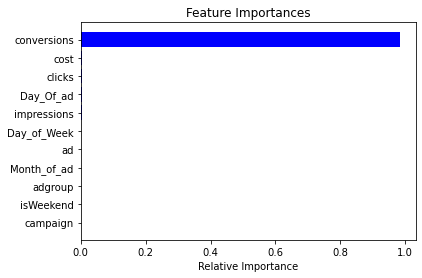

In [44]:
plotFeatureImportances(randomForestModel)

In [113]:
def generateFinalPredictionFile(model):
    y_test_pred = model.predict(X_to_predict.values)
    y_test_pred_exp = np.exp(y_test_pred)
    print(y_test_pred_exp)
    output=pd.DataFrame(y_test_pred_exp, columns = ['revenue']).to_excel("Final_Pred.xlsx", index = False)
    return output

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
def ExtraTreesRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = ExtraTreesRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
extraTreeRegressorModel = ExtraTreesRegressorModel(X,y)

R Squared(Accuracy) 0.9805111427220494
Mean Absolute Error: 0.14712669209331544
Mean Squared Error: 0.1478574839495964
Root Mean Squared Error: 0.3845224102046543
Root Mean Squared Log Error 0.07981016498923152
None


             importance
conversions    0.509706
impressions    0.261990
clicks         0.211010
cost           0.005313
ad             0.002994
Month_of_ad    0.002515
Day_Of_ad      0.002435
Day_of_Week    0.002131
adgroup        0.001123
isWeekend      0.000783
campaign       0.000000


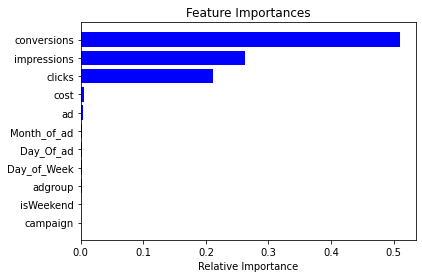

In [47]:
plotFeatureImportances(extraTreeRegressorModel)

In [48]:
from xgboost import XGBRegressor
def XGBRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
xgbRegressorModel = XGBRegressorModel(X,y)

[20:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


R Squared(Accuracy) 0.9808404469471047
Mean Absolute Error: 0.17942916731771807
Mean Squared Error: 0.145359128428992
Root Mean Squared Error: 0.38125992240070555


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
params = {
  'reg_alpha':[1e-5]
}
def XGBoostRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf=XGBRegressor(learning_rate =0.1, n_estimators=240,
     subsample=0.8, colsample_bytree=0.8,
     scale_pos_weight=1, seed=42, max_depth= 10, min_child_weight=5,gamma=0.0, reg_alpha=1e-5)
    rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
xgBoostModel = XGBoostRegressorModel(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'reg_alpha': 1e-05}
R Squared(Accuracy) 0.9788032012946176
Mean Absolute Error: 0.1824147902593079
Mean Squared Error: 0.16081524327800303
Root Mean Squared Error: 0.40101775930500017


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [51]:
from sklearn.ensemble import GradientBoostingRegressor 
def GradientBoostingRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = GradientBoostingRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
gradientBoostingRegressorModel = XGBRegressorModel(X,y)

[20:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


R Squared(Accuracy) 0.9808404469471047
Mean Absolute Error: 0.17942916731771807
Mean Squared Error: 0.145359128428992
Root Mean Squared Error: 0.38125992240070555


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [52]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
def SelectFeaturesFromModel (model,X):
    sel = SelectFromModel(model, prefit = True)
    selected_feat= X.columns[(sel.get_support())]
    print("Total features selected: ", len(selected_feat))
    print("Names of selected Features:\n", selected_feat)
    print("\n")

In [53]:
print("Top selected from random forest regressor:")
SelectFeaturesFromModel(randomForestModel,X)

print("Top selected from extra trees regressor:")
SelectFeaturesFromModel(extraTreeRegressorModel,X)

print("Top selected from xgboost regressor:")
SelectFeaturesFromModel(xgbRegressorModel,X)

Top selected from random forest regressor:
Total features selected:  1
Names of selected Features:
 Index(['conversions'], dtype='object')


Top selected from extra trees regressor:
Total features selected:  3
Names of selected Features:
 Index(['impressions', 'clicks', 'conversions'], dtype='object')


Top selected from xgboost regressor:


NameError: name 'xgbRegressorModel' is not defined

In [54]:
from sklearn.svm import SVR
def SVRModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor=SVR(kernel='linear',degree=1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
svRegressorModel = SVRModel(X,y)

R Squared(Accuracy) 0.5682589227839171
Mean Absolute Error: 1.0001897482656736
Mean Squared Error: 3.2755203901606857
Root Mean Squared Error: 1.8098398797022586


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

count     4570.000000
mean       231.916077
std       1091.856840
min          0.000000
25%          0.000000
50%          0.000000
75%         92.900000
max      20515.410000
Name: revenue, dtype: float64
Skewness: 11.660525
Kurtosis: 165.183470


C:\Users\Risha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

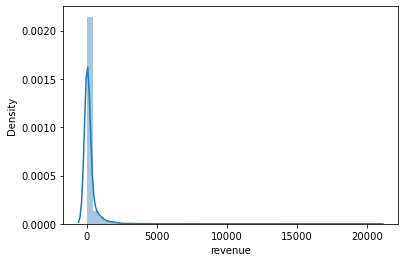

In [56]:
import seaborn as sns
print(df_train['revenue'].describe())
#skewness and kurtosis
print("Skewness: %f" % df_train['revenue'].skew())
print("Kurtosis: %f" % df_train['revenue'].kurt())
sns.distplot(df_train['revenue'])

C:\Users\Risha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


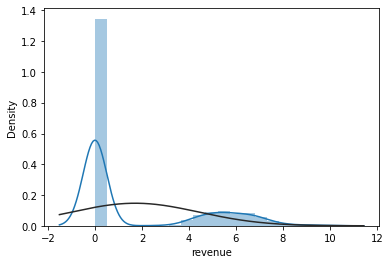

In [57]:
from scipy.stats import norm, skew 
sns.distplot(np.log1p(df_train["revenue"]) , fit=norm);

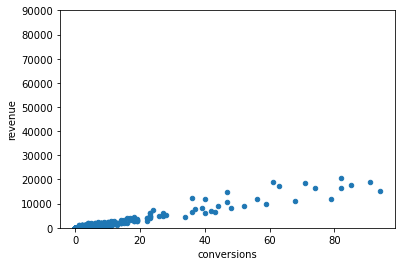

In [58]:
var = 'conversions'
data = pd.concat([df_train['revenue'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='revenue', ylim=(0,90000));

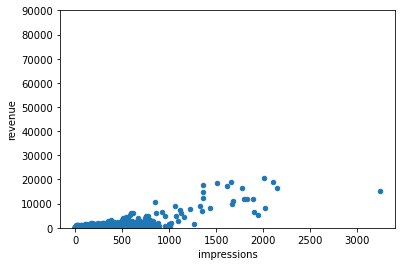

In [59]:
var = 'impressions'
data = pd.concat([df_train['revenue'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='revenue', ylim=(0,90000));

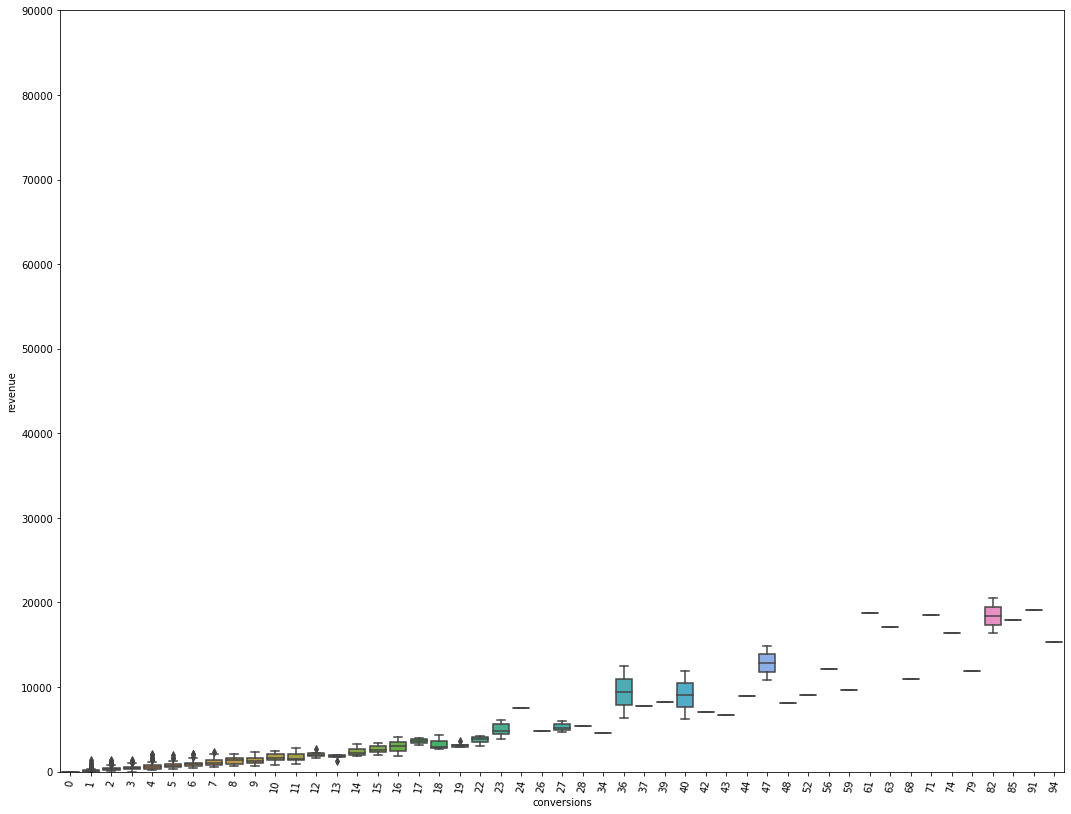

In [60]:
var = 'conversions'
data = pd.concat([df_train['revenue'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 14))
fig = sns.boxplot(x=var, y="revenue", data=data)
plt.xticks(fontsize=10, rotation=80)
fig.axis(ymin=0, ymax=90000);

Text(0.5, 1.0, 'conversions')

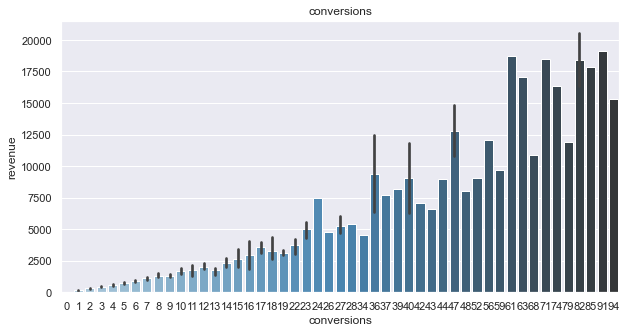

In [62]:
from matplotlib.pyplot import figure
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="conversions", y="revenue", data=df_train, palette="Blues_d")
plt.title('conversions')

C:\Users\Risha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


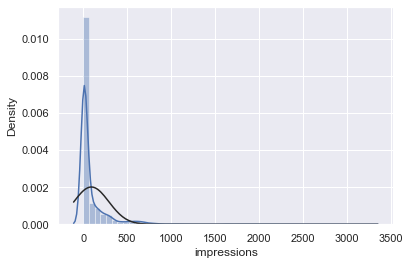

In [63]:
from scipy.stats import norm, skew 
sns.distplot(df_train["impressions"] , fit=norm);

C:\Users\Risha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


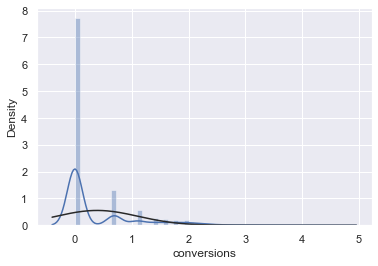

In [64]:
sns.distplot(np.log1p(df_train["conversions"]) , fit=norm);

C:\Users\Risha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Risha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Risha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Risha\anaconda3\lib\si

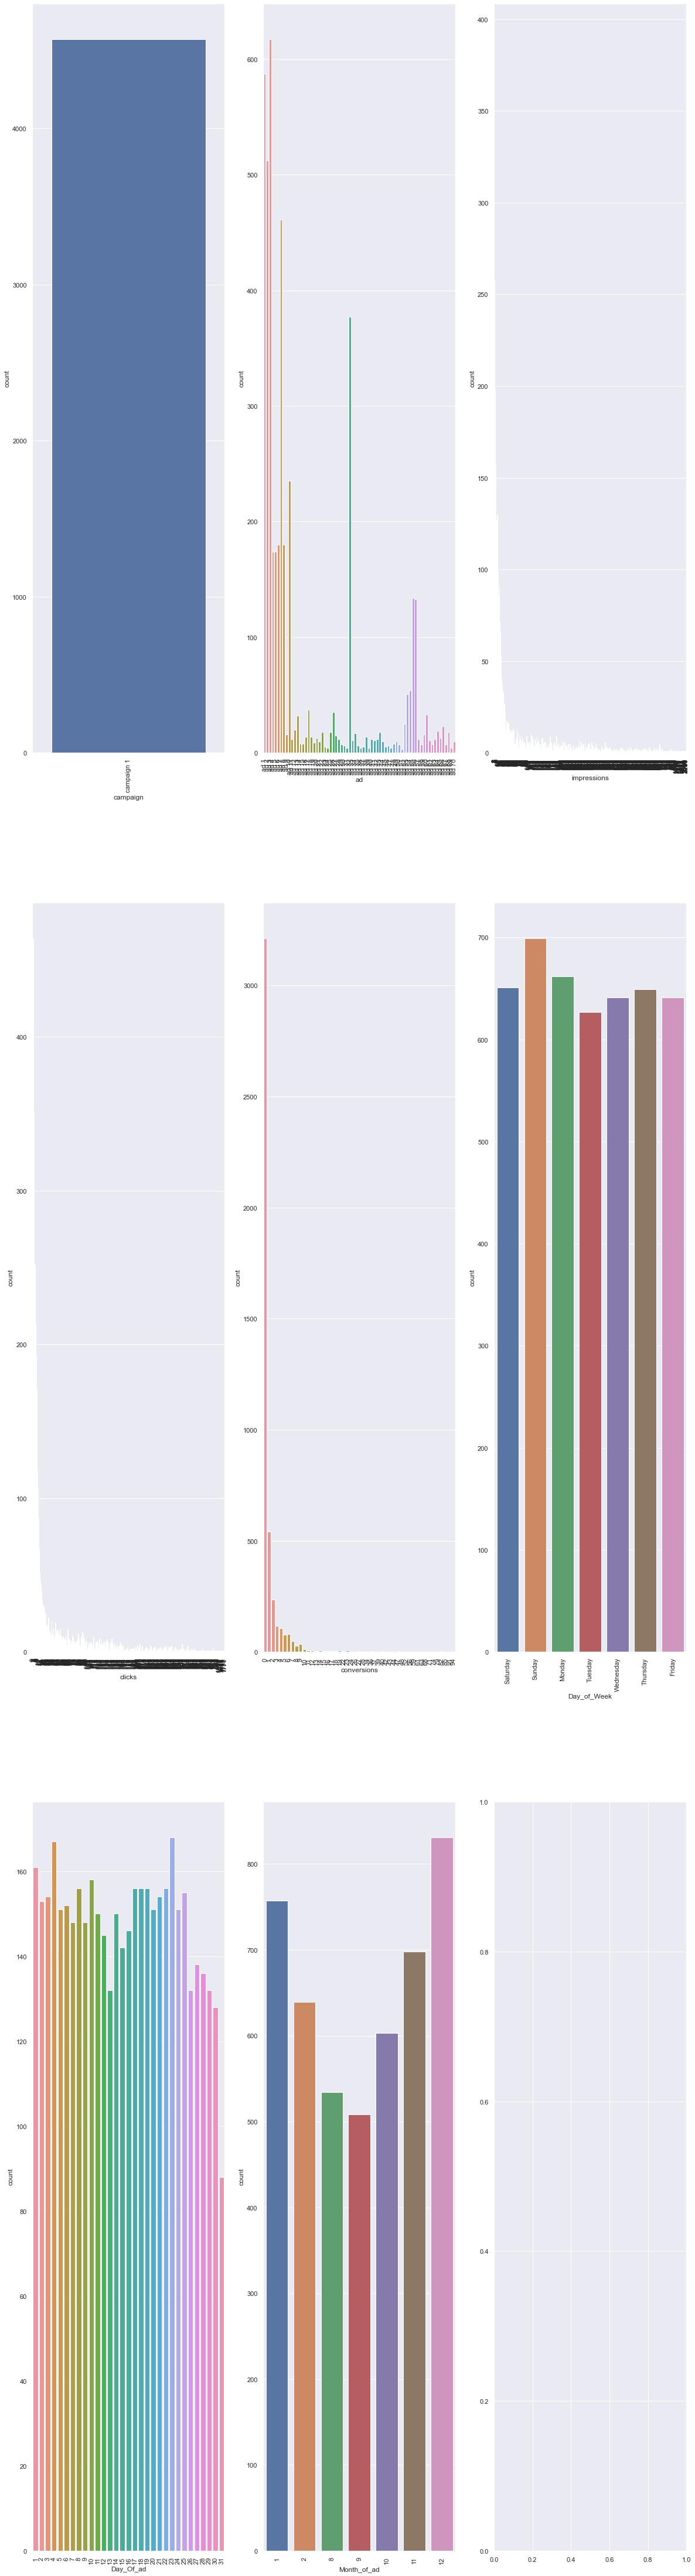

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(20, 80))
columns = X_categorical_graph.columns.tolist()
for variable, subplot in zip(columns, ax.flatten()):
    sns.countplot(X_categorical_graph[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

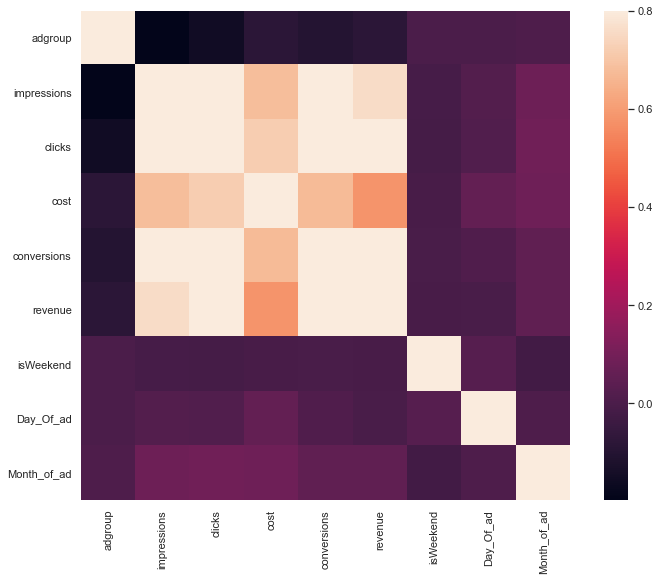

In [66]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [67]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVGradientBoostingRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
    estimator = GradientBoostingRegressor(random_state=42,n_estimators=800,learning_rate=0.05,max_depth=8)
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    param_grid={ 
                'subsample':[1.0]
               } 
    n_jobs=8
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
gradientBoostingModelCV = GridSearchCVGradientBoostingRegressor(X,y)

{'subsample': 1.0}
R Squared(Accuracy) 0.9790104556153761
Mean Absolute Error: 0.15811153177175263
Mean Squared Error: 0.15924285234876692
Root Mean Squared Error: 0.3990524431058741


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [68]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVRandomForestRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    # Create the random grid
    param_grid = { 
    'n_estimators': [10, 18, 22, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
    }
    n_jobs=4
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
randomForestRegressorModel = GridSearchCVRandomForestRegressor(X,y)

{'max_features': 'auto', 'n_estimators': 700}
R Squared(Accuracy) 0.9818734705110165
Mean Absolute Error: 0.14175153352543954
Mean Squared Error: 0.13752181591537194
Root Mean Squared Error: 0.37083933976234495
Root Mean Squared Log Error 0.07637265746079815
None


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split 

# Number of trees in random forest
n_estimators = [644]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'max_features': max_features,
               'bootstrap': bootstrap,
               'n_estimators': n_estimators
              }
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model

def RandomizedSearchCVRandomForestRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    n_jobs=4
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
randomForestRegressorModel2 = RandomizedSearchCVRandomForestRegressor(X,y)

C:\Users\Risha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'n_estimators': 644, 'max_features': 'auto', 'bootstrap': True}
R Squared(Accuracy) 0.9819115163785942
Mean Absolute Error: 0.14100086540545603
Mean Squared Error: 0.13723317065646862
Root Mean Squared Error: 0.37044995702047073
Root Mean Squared Log Error 0.07635427033732602
None


In [74]:
generateFinalPredictionFile(randomForestRegressorModel2)

[1.24920590e+02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.51427454e+01 1.00000000e+00
 1.17268393e+02 1.00000000e+00 4.28119547e+02 1.00000000e+00
 1.00000000e+00 2.71876912e+02 1.00000000e+00 1.24111681e+02
 1.00000000e+00 1.02405076e+02 1.00000000e+00 1.46256035e+02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 4.80097475e+02
 1.00000000e+00 1.00000000e+00 6.32391268e+02 9.47155309e+01
 1.00000000e+00 1.00000000e+00 4.16774768e+02 1.00000000e+00
 9.20877982e+02 3.35941005e+02 1.33793639e+02 1.00000000e+00
 1.12649392e+02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 3.52642435e+02 1.17605479e+02 9.31402950e+01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 8.99033598e+02
 1.00000000e+00 3.26819004e+02 1.00000000e+00 3.26030556e+02
 1.00000000e+00 1.000000

In [122]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVExtraTreesRegressor(X,y,test):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor(random_state=42, n_estimators=900, max_depth=18)
    # Create the random grid
    param_grid = { 
    'min_samples_split':range(10,100,5)
    }
    n_jobs=8
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    #return regressor.best_estimator_
    return y_pred
G = GridSearchCVExtraTreesRegressor(X,y,X_to_predict)

{'min_samples_split': 15}


ValueError: Found input variables with inconsistent numbers of samples: [1371, 318]

In [114]:
revenue=generateFinalPredictionFile(extraTreesRegressorModelCV)

[1.29982569e+02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.30909959e+02 1.00000000e+00
 1.25638287e+02 1.00000000e+00 4.45117020e+02 1.00000000e+00
 1.00000000e+00 2.51651963e+02 1.00000000e+00 1.18165836e+02
 1.00000000e+00 1.20513516e+02 1.00000000e+00 1.26535997e+02
 1.00000000e+00 1.02418314e+00 1.00000000e+00 4.51638349e+02
 1.00000000e+00 1.00000000e+00 5.58449812e+02 1.20162348e+02
 1.00000000e+00 1.00000000e+00 4.18199845e+02 1.00000000e+00
 8.28024258e+02 2.92403246e+02 1.13845079e+02 1.00000000e+00
 1.26246914e+02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 2.71335061e+02 1.41487342e+02 7.75392916e+01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 8.48686253e+02
 1.00000000e+00 2.61960260e+02 1.00000000e+00 2.76224890e+02
 1.00000000e+00 1.024828

In [118]:
G

array([0.        , 0.        , 5.95380278, ..., 0.        , 0.        ,
       5.98626172])

In [120]:
submission = pd.DataFrame(G)
submission.columns=['revenue']
submission.to_csv('revenue.csv')

# res = pd.DataFrame(generateFinalPredictionFile(extraTreesRegressorModelCV)) 
res.index = df_to_predict.index==[3] 
res.columns = ["generateFinalPredictionFile(extraTreesRegressorModelCV"]
res.to_csv("generateFinalPredictionFile(extraTreesRegressorModelCV.csv", index = False)    

In [101]:
res = pd.DataFrame(generateFinalPredictionFile(extraTreesRegressorModelCV)) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = df_to_predict.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["generateFinalPredictionFile(extraTreesRegressorModelCV)"]
res.to_csv("generateFinalPredictionFile(extraTreesRegressorModelCV",index = False, axis=0)      # the csv file will be saved locally on the same location where this notebook is located.

[1.29982569e+02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.30909959e+02 1.00000000e+00
 1.25638287e+02 1.00000000e+00 4.45117020e+02 1.00000000e+00
 1.00000000e+00 2.51651963e+02 1.00000000e+00 1.18165836e+02
 1.00000000e+00 1.20513516e+02 1.00000000e+00 1.26535997e+02
 1.00000000e+00 1.02418314e+00 1.00000000e+00 4.51638349e+02
 1.00000000e+00 1.00000000e+00 5.58449812e+02 1.20162348e+02
 1.00000000e+00 1.00000000e+00 4.18199845e+02 1.00000000e+00
 8.28024258e+02 2.92403246e+02 1.13845079e+02 1.00000000e+00
 1.26246914e+02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 2.71335061e+02 1.41487342e+02 7.75392916e+01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 8.48686253e+02
 1.00000000e+00 2.61960260e+02 1.00000000e+00 2.76224890e+02
 1.00000000e+00 1.024828

ValueError: Length mismatch: Expected axis has 0 elements, new values have 318 elements

In [121]:
X_to_predict.shape

(318, 11)

In [123]:
lid=LinearRegression().fit(X, y)

In [124]:
final=lid.predict(X_to_predict)

In [126]:
final.shape

(318,)

In [128]:
submission = pd.DataFrame(final)
submission.columns=['revenue']
submission.to_csv('revenue1.csv',index=False)